In [217]:
!pip install plotly

In [218]:
import pandas as pd
import numpy as np
import datetime

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.api.types import CategoricalDtype
warnings.filterwarnings("ignore")

In [219]:
#reading data from local machine
data=pd.read_csv('C:/Users/ankit/Desktop/Great learning/Project/Project-1 Ecommerce/ecommerce.csv',low_memory=False)

In [220]:
data.shape

(51290, 21)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51290 non-null  object 
 1   Order Date        51289 non-null  object 
 2   Ship Date         51290 non-null  object 
 3   Aging             51289 non-null  float64
 4   Ship Mode         51290 non-null  object 
 5   Product Category  51290 non-null  object 
 6   Product           51290 non-null  object 
 7   Sales             51290 non-null  object 
 8   Quantity          51289 non-null  object 
 9   Discount          51290 non-null  object 
 10  Profit            51290 non-null  object 
 11  Shipping Cost     51290 non-null  object 
 12  Order Priority    51288 non-null  object 
 13  Customer ID       51289 non-null  object 
 14  Customer Name     51290 non-null  object 
 15  Segment           51289 non-null  object 
 16  City              51290 non-null  object

# Data Cleaning


In [222]:
data.sample()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
21626,FA-2015-1112,1/20/15,1/26/15,6.0,Standard Class,Fashion,T - Shirts,$248.00,3,0.04,...,$13.80,High,ER-0011318,Meyers Pelletier,Corporate,La Ceiba,Atlántida,Honduras,Central,Jan


In [223]:
#finding column which have null entries
data.isnull().sum()

Order ID            0
Order Date          1
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

In [224]:
#dropping entries with null values
data.dropna(inplace=True)

In [225]:
data.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

In [226]:
data.shape

(51282, 21)

In [227]:
#checking for Duplicated entries
data.duplicated().sum()

0

### inference:
The no of rows containing null values was 8 which has been removed.<br>
No duplicate data found in the Dataset.<br>
As most of the data are in datatype object so it needs to be coverted to the convenient data type for computation and analysis.


### converting data to relevant datatype

In [228]:
data['Order Date'] =pd.to_datetime(data['Order Date'])

In [229]:
data['Ship Date'] =pd.to_datetime(data['Ship Date'])

In [230]:
data.Aging=data.Aging.astype(int)

In [231]:
data.Sales=data.Sales.str.replace("$","")
data.Sales=pd.to_numeric(data.Sales,errors='coerce')




In [232]:
data.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               1
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

In [233]:
data.Sales.fillna(data.Sales.median(),inplace=True)

In [234]:
data.Quantity=pd.to_numeric(data.Quantity,errors='coerce')

In [235]:
data.dropna(inplace=True)

In [236]:
data["Ship Mode"].unique()
data[data["Ship Mode"]=='45788']
data.drop(1024,inplace=True)

In [237]:
data.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

In [238]:
data.Quantity=data.Quantity.astype(int)

In [239]:
data.Discount=pd.to_numeric(data.Discount,errors='coerce')

In [240]:
data.Discount.fillna(data.Sales.median(),inplace=True)

In [241]:
data.Profit.head(5)

0     $46.00 
1    $112.00 
2     $31.20 
3     $26.20 
4    $160.00 
Name: Profit, dtype: object

In [242]:
data.Profit=data.Profit.str.replace("$","")

In [243]:
data.Profit=pd.to_numeric(data.Profit)

In [244]:
data['Shipping Cost']=data['Shipping Cost'].str.replace("$","")

In [245]:
data['Shipping Cost']=pd.to_numeric(data['Shipping Cost'],errors='coerce')

In [246]:
data.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       1
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

In [247]:
data['Shipping Cost'].fillna(data['Shipping Cost'].median(),inplace=True)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51280 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51280 non-null  object        
 1   Order Date        51280 non-null  datetime64[ns]
 2   Ship Date         51280 non-null  datetime64[ns]
 3   Aging             51280 non-null  int32         
 4   Ship Mode         51280 non-null  object        
 5   Product Category  51280 non-null  object        
 6   Product           51280 non-null  object        
 7   Sales             51280 non-null  float64       
 8   Quantity          51280 non-null  int32         
 9   Discount          51280 non-null  float64       
 10  Profit            51280 non-null  float64       
 11  Shipping Cost     51280 non-null  float64       
 12  Order Priority    51280 non-null  object        
 13  Customer ID       51280 non-null  object        
 14  Customer Name     5128

In [249]:
data.sample(50)

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
8641,El-2015-1137,2015-11-11,2015-11-11,1,Same Day,Electronic,Mixer/Juicer,83.0,1,0.04,...,8.3,Critical,SE-008642,Acosta Morse,Corporate,Montesson,Ile-de-France,France,Central,Nov
28022,FA-2015-7508,2015-01-15,2015-01-16,1,Standard Class,Fashion,Casula Shoes,122.0,1,0.03,...,3.8,Medium,NG-0017714,Burns Chung,Consumer,Kananga,Kasai-Occidental,Democratic Republic of the Congo,Africa,Jan
50166,FA-2015-29652,2015-08-30,2015-09-05,6,Standard Class,Fashion,Sneakers,62.0,5,0.04,...,1.2,Medium,ER-0039858,Richards Drucker,Corporate,San Antonio,Texas,United States,Central,Aug
47585,FA-2015-27071,2015-04-23,2015-04-26,3,Standard Class,Fashion,Shirts,196.0,1,0.03,...,11.0,Medium,NG-0037277,Harris Armstrong,Corporate,Hyderabad,Telangana,India,Central Asia,Apr
14572,HF-2015-4367,2015-11-09,2015-11-13,4,Second Class,Home & Furniture,Dinning Tables,119.0,4,0.01,...,3.4,High,OK-0045348,Walker Ashbrook,Consumer,Kabul,Kabul,Afghanistan,Central Asia,Nov
49095,FA-2015-28581,2015-04-09,2015-04-13,4,Standard Class,Fashion,Sports Wear,85.0,2,0.04,...,4.3,Medium,NO-0038787,West Cano,Consumer,Abeokuta,Ogun,Nigeria,Africa,Apr
31557,FA-2015-11043,2015-01-07,2015-01-16,9,Standard Class,Fashion,Titak watch,228.0,5,0.01,...,13.7,High,LL-0021249,Hancock O'Brill,Consumer,Nellore,Andhra Pradesh,India,Central Asia,Jan
24202,FA-2015-3688,2015-03-23,2015-03-31,8,Standard Class,Fashion,Jeans,218.0,1,0.01,...,13.6,High,LE-0013894,Owens Carlisle,Consumer,San Diego,California,United States,West,Mar
21288,FA-2015-774,2015-10-01,2015-10-06,5,Standard Class,Fashion,Suits,109.0,3,0.03,...,1.9,Medium,AN-0010980,Williams Abelman,Corporate,Le Cannet,Provence-Alpes-Côte d'Azur,France,Central,Oct
29043,FA-2015-8529,2015-07-20,2015-07-28,8,Standard Class,Fashion,Suits,109.0,1,0.02,...,2.7,Medium,AS-0018735,Tran Matthias,Consumer,Basra,Al Basrah,Iraq,EMEA,Jul


In [250]:
data["Segment"].nunique()

3

In [251]:
data["Segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [252]:
data["City"].nunique()

3636

In [253]:
data["Country"].nunique()

147

In [254]:
data["Region"].nunique()

15

In [255]:
data["Region"].value_counts()

Central           11116
South              6642
EMEA               5029
North              4782
Africa             4586
Oceania            3486
West               3202
Southeast Asia     3129
East               2848
North Asia         2336
Central Asia       2048
Caribbean          1690
Canada              384
So3th                 1
4orth                 1
Name: Region, dtype: int64

In [256]:
data["Region"]=data["Region"].str.replace('So3th','South')
data["Region"]=data["Region"].str.replace('4orth','North')

In [257]:
data["Region"].nunique()

13

In [258]:
data["Months"].unique()

array(['Nov', 'Jun', 'Dec', 'May', 'Jul', 'Feb', 'Apr', 'Mar', 'Sep',
       'Oct', 'Jan', 'Aug'], dtype=object)

In [259]:
data.shape

(51280, 21)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51280 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51280 non-null  object        
 1   Order Date        51280 non-null  datetime64[ns]
 2   Ship Date         51280 non-null  datetime64[ns]
 3   Aging             51280 non-null  int32         
 4   Ship Mode         51280 non-null  object        
 5   Product Category  51280 non-null  object        
 6   Product           51280 non-null  object        
 7   Sales             51280 non-null  float64       
 8   Quantity          51280 non-null  int32         
 9   Discount          51280 non-null  float64       
 10  Profit            51280 non-null  float64       
 11  Shipping Cost     51280 non-null  float64       
 12  Order Priority    51280 non-null  object        
 13  Customer ID       51280 non-null  object        
 14  Customer Name     5128

# checking for outliers

In [261]:
num_object=data1.select_dtypes(include=[int,float])
num_object.head(5)

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost,days
0,8,140.0,2,0.05,46.0,4.6,9
1,2,211.0,3,0.03,112.0,11.2,30
2,8,117.0,5,0.01,31.2,3.1,5
3,7,118.0,2,0.05,26.2,2.6,9
4,9,250.0,1,0.04,160.0,16.0,9


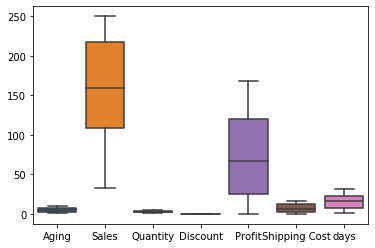

In [262]:
sns.boxplot(num_object)
plt.show()

# Inference:
There is one outlier at discount column which can easily be dropped

In [263]:
data[data['Discount']==159]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
211,AU-2015-212,2015-09-02,2015-09-08,6,First Class,Auto & Accessories,Tyre,250.0,5,159.0,...,13.3,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep


In [264]:
data.drop(211,inplace=True)
data.head(210)

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,AU-2015-211,2015-11-16,2015-11-20,4,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.04,...,2.9,Medium,ON-00211,Alvarez Eaton,Corporate,Mexico City,Distrito Federal,Mexico,North,Nov
212,AU-2015-213,2015-12-31,2016-01-06,6,First Class,Auto & Accessories,Bike Tyres,72.0,4,0.04,...,1.8,High,ER-00213,Cameron Packer,Consumer,Houston,Texas,United States,Central,Dec
213,AU-2015-214,2015-11-19,2015-11-22,3,First Class,Auto & Accessories,Car Mat,54.0,5,0.03,...,1.1,Critical,IN-00214,Barker Haberlin,Corporate,Casablanca,Grand Casablanca,Morocco,Africa,Nov
214,AU-2015-215,2015-10-22,2015-10-23,1,First Class,Auto & Accessories,Car Seat Covers,114.0,3,0.01,...,3.1,Medium,LY-00215,Winters Shonely,Consumer,Santo André,São Paulo,Brazil,South,Oct


In [265]:
data.describe()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51279.000000,51279.000000,51279.000000,51279.000000,51279.000000,51279.000000
mean,5.255212,156.430196,2.997289,0.029971,72.724088,7.272813
std,2.960032,65.779671,1.413363,0.014114,49.097676,4.908448
min,1.000000,33.000000,1.000000,0.010000,0.500000,0.100000
25%,3.000000,109.000000,2.000000,0.020000,25.700000,2.600000
50%,5.000000,159.000000,3.000000,0.030000,67.000000,6.700000
75%,8.000000,218.000000,4.000000,0.040000,120.600000,12.100000
max,10.000000,250.000000,5.000000,0.050000,167.500000,16.800000


In [266]:
data.corr()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
Aging,1.000000,0.014841,-0.002506,0.000105,0.015276,0.015216
Sales,0.014841,1.000000,-0.000596,-0.007187,0.921513,0.921238
Quantity,-0.002506,-0.000596,1.000000,0.007045,-0.176308,-0.176670
Discount,0.000105,-0.007187,0.007045,1.000000,-0.118996,-0.119306
Profit,0.015276,0.921513,-0.176308,-0.118996,1.000000,0.999954
Shipping Cost,0.015216,0.921238,-0.176670,-0.119306,0.999954,1.000000


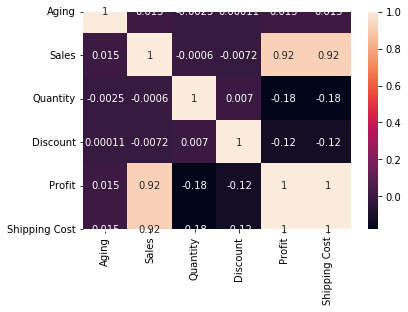

In [267]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [268]:
data.describe(include=object)

,Order ID,Ship Mode,Product Category,Product,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
count,51279,51279,51279,51279,51279,51279,51279,51279,51279,51279,51279,51279,51279
unique,51279,4,4,42,4,51279,795,3,3636,1094,147,13,12
top,AU-2015-1,Standard Class,Fashion,Sports Wear,Medium,LS-001,Mcclain O'Donnell,Consumer,New York City,California,United States,Central,Jul
freq,1,30775,30775,2827,29430,1,108,26511,915,2000,9993,11115,4445


In [269]:
data1=data.copy()

# Order Trend Analysis

In [270]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_type=CategoricalDtype(categories=month,ordered=True)
data1["Months"]=data1["Months"].astype(month_type)


In [271]:
monthly_order=data1.groupby("Months").size()
monthly_order

Months
Jan    4365
Feb    3876
Mar    4412
Apr    4172
May    4293
Jun    4210
Jul    4445
Aug    4296
Sep    4195
Oct    4380
Nov    4206
Dec    4429
dtype: int64

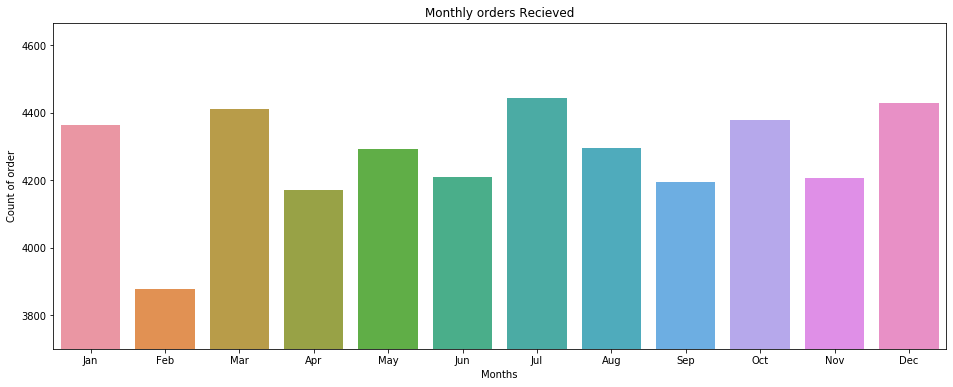

In [272]:
plt.figure(figsize=(16,6))

ax=sns.barplot(x=monthly_order.index,y=monthly_order.values)
ax.set_ylim(bottom=3700)
#colors = plt.get_cmap('Set1').colors
plt.xlabel("Months")
plt.ylabel("Count of order")
plt.title("Monthly orders Recieved")
plt.show()

In [273]:
data1["day_of_week"]=data1["Order Date"].dt.day_name()

In [274]:
data1.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months,day_of_week
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,Monday
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,Tuesday
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,Saturday
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,Saturday
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,Thursday


In [275]:
data1.groupby("day_of_week").size()

day_of_week
Friday       7229
Monday       7258
Saturday     7252
Sunday       7359
Thursday     7433
Tuesday      7332
Wednesday    7416
dtype: int64

In [276]:
days=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
cat_type = CategoricalDtype(categories=days, ordered=True)

data1['day_of_week'] = data1['day_of_week'].astype(cat_type)

Weekly_order=data1.groupby("day_of_week").size()

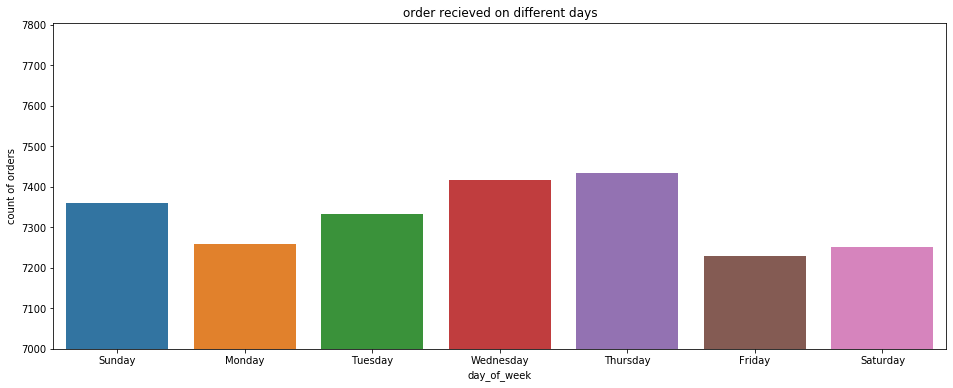

In [277]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x=Weekly_order.index,y=Weekly_order.values)
ax.set_ylim(bottom=7000)
plt.ylabel("count of orders")
plt.title("order recieved on different days")
plt.show()

In [278]:
data1["days"]=data1['Order Date'].dt.day

In [279]:
data1.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Customer ID,Customer Name,Segment,City,State,Country,Region,Months,day_of_week,days
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,Monday,9
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,Tuesday,30
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,Saturday,5
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,Saturday,9
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,Thursday,9


In [280]:
daily_order=data1.groupby("days").size()

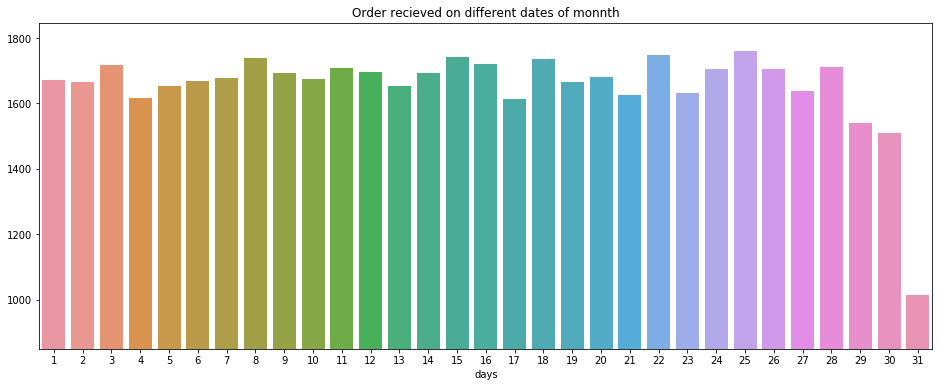

In [281]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x=daily_order.index,y=daily_order.values)
ax.set_ylim(bottom=850)
plt.title("Order recieved on different dates of monnth")
plt.show()

### Inference:
The reduction in order on 31 st may be as 31st is not there in every month<br>
Towards the end of month we see a reduction in order tendency may be because of the end of month and less money to spend.<br>
Also month of feb doesnt have last 3 days affect of  which should also be included


# Shipping Analysis

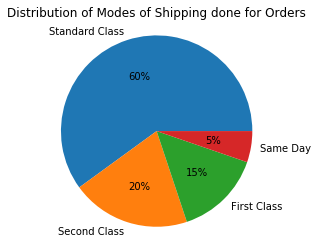

In [282]:
#understanding the shipping mode of the order   
plt.pie(x=data["Ship Mode"].value_counts(),autopct='%.0f%%',radius=1.1, labeldistance=1.1,labels=data["Ship Mode"].value_counts().index)
plt.title("Distribution of Modes of Shipping done for Orders")
plt.show()

In [283]:
shipping_Cost=data1.groupby("Ship Mode")["Shipping Cost"].median()

In [284]:
shipping_Cost


Ship Mode
First Class       3.6
Same Day          4.7
Second Class      3.7
Standard Class    9.2
Name: Shipping Cost, dtype: float64

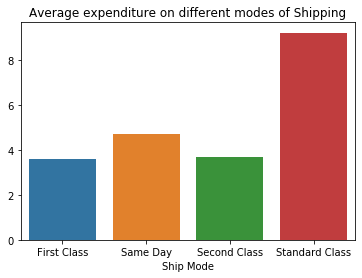

In [285]:
sns.barplot(x=shipping_Cost.index,y=shipping_Cost.values)
plt.title("Average expenditure on different modes of Shipping")
plt.show()

# inference
From the data it can be seen the mean spending of standard class is highest and also it accounts for about 60 percent total order booking.

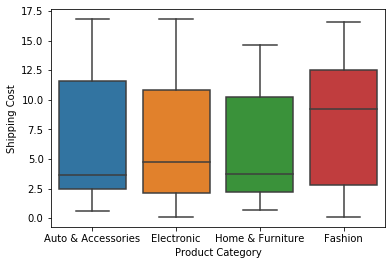

In [286]:
sns.boxplot(data1,x='Product Category',y='Shipping Cost')
plt.show()

# inference 
From the above analysis we can see that mean shipping cost for fashiop product is relatively high almost double other categories

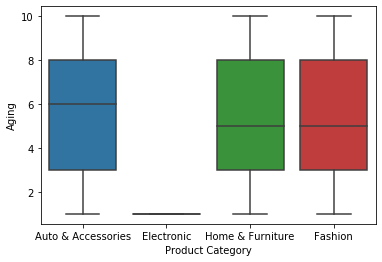

In [287]:
sns.boxplot(data1,x='Product Category',y='Aging')
plt.show()

In [288]:
data1.groupby('Product Category')['Aging'].median()

Product Category
Auto & Accessories    6.0
Electronic            1.0
Fashion               5.0
Home & Furniture      5.0
Name: Aging, dtype: float64

In [289]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51279 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51279 non-null  object        
 1   Order Date        51279 non-null  datetime64[ns]
 2   Ship Date         51279 non-null  datetime64[ns]
 3   Aging             51279 non-null  int32         
 4   Ship Mode         51279 non-null  object        
 5   Product Category  51279 non-null  object        
 6   Product           51279 non-null  object        
 7   Sales             51279 non-null  float64       
 8   Quantity          51279 non-null  int32         
 9   Discount          51279 non-null  float64       
 10  Profit            51279 non-null  float64       
 11  Shipping Cost     51279 non-null  float64       
 12  Order Priority    51279 non-null  object        
 13  Customer ID       51279 non-null  object        
 14  Customer Name     5127

# Inference: 
From the graphs and data it can be infered that the all the electronic items are shipped within a day while for other item avg is 5-6 days

In [290]:
Top_10_highest_shipping_cost=data1.groupby('Product')['Shipping Cost'].mean().sort_values(ascending=False)[0:10]
Top_10_highest_shipping_cost

Product
Apple Laptop              14.958824
Tyre                      14.827048
T - Shirts                14.592484
Car Pillow & Neck Rest    13.004710
Towels                    12.758852
Titak watch               12.710054
Running Shoes             12.395707
Iron                      12.150679
Samsung Mobile            12.018552
Jeans                     11.872942
Name: Shipping Cost, dtype: float64

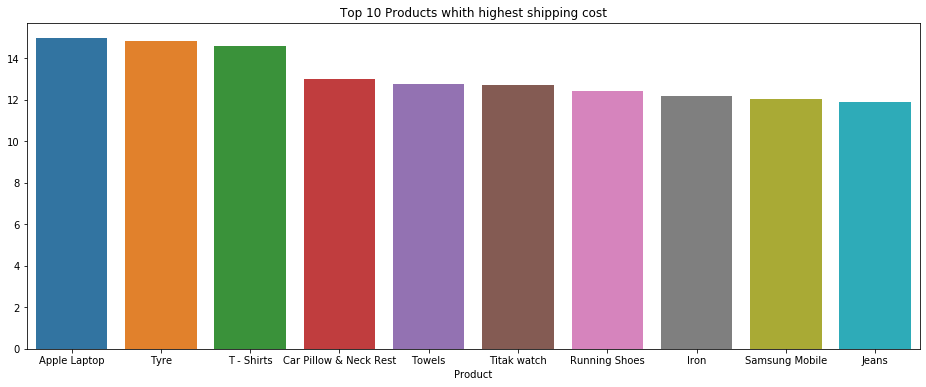

In [291]:
plt.figure(figsize=(16,6))
plt.title("Top 10 Products whith highest shipping cost")
sns.barplot(x=Top_10_highest_shipping_cost.index,y=Top_10_highest_shipping_cost.values)
plt.show()

# Sales Analysis

In [292]:
data1.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

Product Category
Fashion               92071
Home & Furniture      31055
Auto & Accessories    22361
Electronic             8211
Name: Quantity, dtype: int32

In [293]:
#top 10 most selling products 
prod_quantity=data1.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
prod_quantity

Product
Titak watch               8535
Sports Wear               8512
Formal Shoes              8438
Casula Shoes              8436
Sneakers                  8353
T - Shirts                8346
Running Shoes             8345
Fossil Watch              8308
Suits                     8295
Jeans                     8266
Shirts                    8237
Beds                      3142
Sofa Covers               3140
Dinning Tables            3140
Sofas                     3126
Dinner Crockery           3125
Towels                    3124
Shoe Rack                 3076
Curtains                  3070
Bed Sheets                3068
Umbrellas                 3044
Tyre                      2640
Car Body Covers           2553
Car Speakers              2528
Car Pillow & Neck Rest    2489
Bike Tyres                2480
Car Mat                   2469
Car & Bike Care           2438
Car Seat Covers           2385
Car Media Players         2379
Speakers                   789
LED                        706


In [294]:
fig = px.treemap(data1, path=[px.Constant("All Products"), 'Product Category', 'Product'], values='Quantity')
fig.show()

# Inference:
Among all Products the demand for fashion category is highest while the demand for electronic product is lowest

In [295]:
data1.groupby('Product Category')['Profit'].sum().sort_values(ascending=False)

Product Category
Fashion               2483955.2
Home & Furniture       587614.3
Auto & Accessories     483458.4
Electronic             174190.6
Name: Profit, dtype: float64

In [296]:
prod_profit=(data1.groupby('Product')['Profit'].median().sort_values(ascending=False))


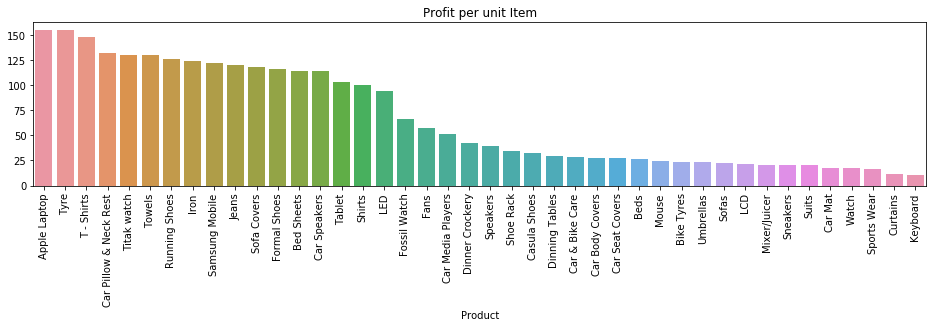

In [297]:
plt.figure(figsize=(16,3))
sns.barplot(x=prod_profit.index,y=prod_profit.values)
plt.xticks(rotation=90)
plt.title("Profit per unit Item")
plt.show()

# Inference:
From the above graph we can see that which products gives the max profit and for which product profits are the lowest

In [298]:
data1.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)

Product Category
Fashion               5212097.0
Home & Furniture      1319407.0
Auto & Accessories    1095342.0
Electronic             394738.0
Name: Sales, dtype: float64

In [299]:
prod_Sales=(data1.groupby('Product')['Sales'].sum().sort_values(ascending=False))

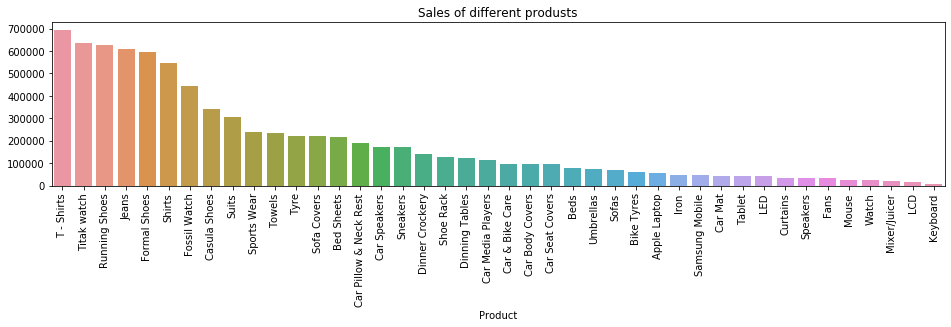

In [300]:
plt.figure(figsize=(16,3))
sns.barplot(x=prod_Sales.index,y=prod_Sales.values)
plt.xticks(rotation=90)
plt.title("Sales of different produsts")
plt.show()

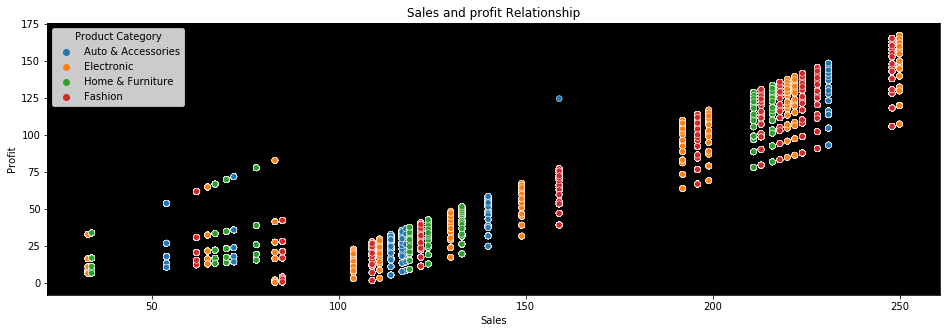

In [301]:
plt.figure(figsize=(16,5))
ax=plt.subplot()
ax.set_facecolor("black")
sns.scatterplot(x=data1["Sales"],y=data1["Profit"],hue=data1["Product Category"])
#plt.xticks('Sales')
#plt.ylabel('profit')
plt.title('Sales and profit Relationship')
plt.show()

In [302]:
data1['Profit'].corr(data1['Sales'])

0.9215125543871807

In [303]:
#Inference:

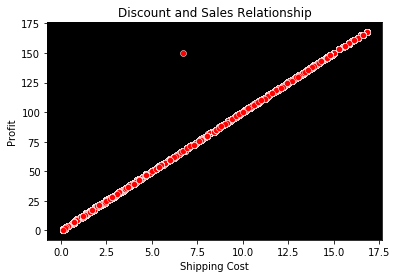

In [304]:
ax=plt.subplot()
ax.set_facecolor("black")
sns.scatterplot(x=data1["Shipping Cost"],y=data1["Profit"],color='red')
#plt.xlabel('Discount')
#plt.ylabel('Sales')
plt.title('Discount and Sales Relationship')
plt.show()

In [305]:
data1['Shipping Cost'].corr(data1['Profit']).round(1)

1.0

# Inference:
It can be assumed from above relationship that  increase in profit with shipping cost, signifies that the additional cost of shipping is being passed on to the customer in the form of higher prices. This is resulting in higher profits for the company.

# Customer Segmentation

In [306]:
Region_distribution=data1.groupby("Region")["Profit"].sum().sort_values(ascending=False)
Region_distribution

Region
Central           803978.1
South             479079.9
EMEA              368570.7
North             349014.3
Africa            332166.0
Oceania           253577.6
Southeast Asia    235598.1
West              231761.4
East              206694.5
North Asia        170857.0
Central Asia      149529.7
Caribbean         120608.1
Canada             27783.1
Name: Profit, dtype: float64

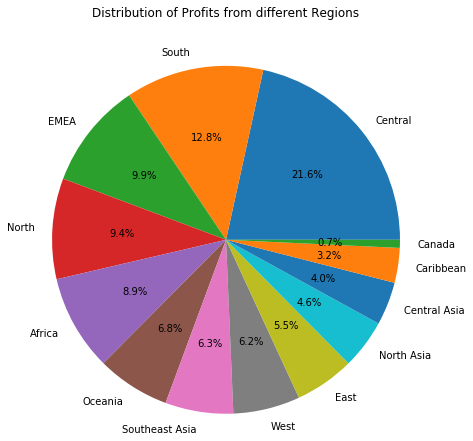

In [307]:
plt.pie(x=Region_distribution.values,radius=2,autopct='%.1f%%', labels=Region_distribution.index)
plt.title("Distribution of Profits from different Regions",y=1.5)
plt.show()

In [308]:
top_10_country=data1.groupby('Country')["Profit"].sum().sort_values(ascending=False)[0:10]


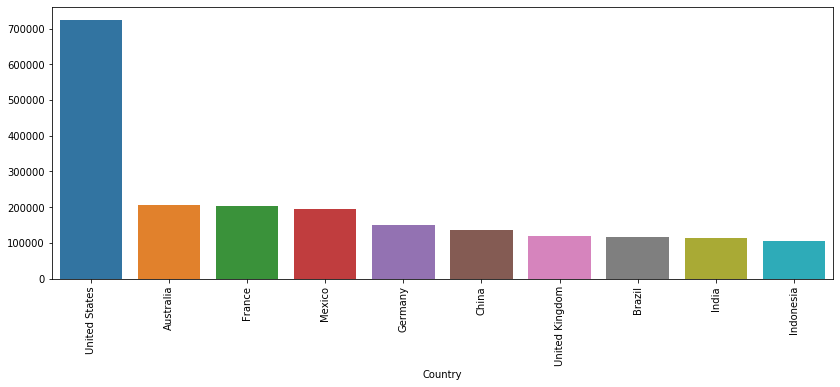

In [309]:
plt.figure(figsize=(14,5))
sns.barplot(x=top_10_country.index,y=top_10_country.values)
plt.xticks(rotation=90)
plt.show()

In [310]:
Top_10_state=data1.groupby('State')["Profit"].sum().sort_values(ascending=False)[0:10]

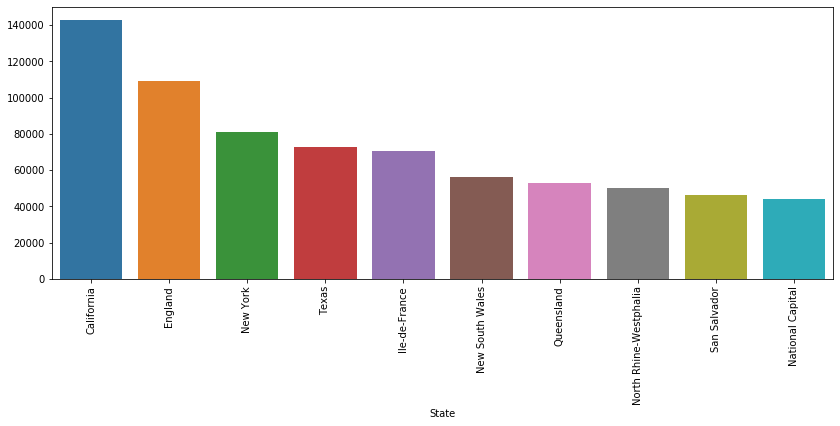

In [311]:
plt.figure(figsize=(14,5))
sns.barplot(x=Top_10_state.index,y=Top_10_state.values)
plt.xticks(rotation=90)
plt.show()

In [312]:
top_10_city=data1.groupby('City')["Profit"].sum().sort_values(ascending=False)[0:10]

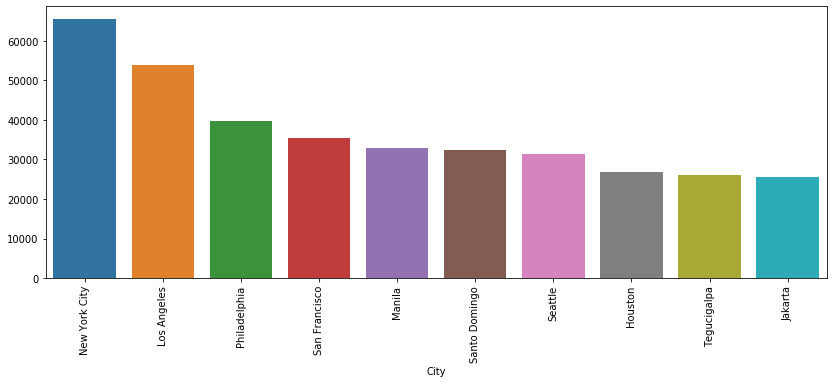

In [313]:
plt.figure(figsize=(14,5))
sns.barplot(x=top_10_city.index,y=top_10_city.values)
plt.xticks(rotation=90)
plt.show()